In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<AxesSubplot:xlabel='price', ylabel='Density'>

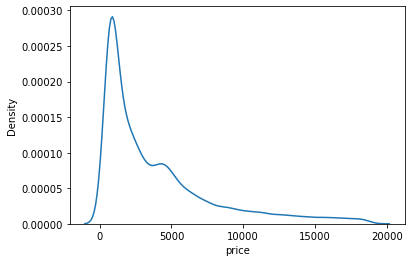

In [6]:
sns.kdeplot(df['price'])

<AxesSubplot:xlabel='cut', ylabel='count'>

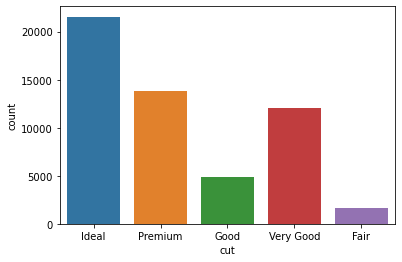

In [7]:
sns.countplot(df['cut'])

<AxesSubplot:xlabel='color', ylabel='count'>

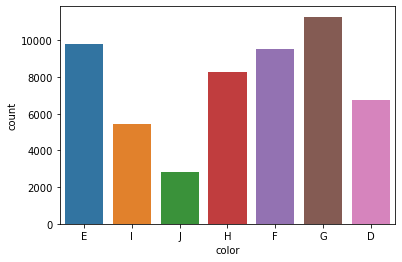

In [8]:
sns.countplot(df['color'])

<AxesSubplot:xlabel='clarity', ylabel='count'>

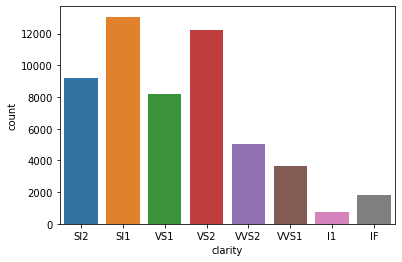

In [9]:
sns.countplot(df['clarity'])

<AxesSubplot:xlabel='carat', ylabel='Density'>

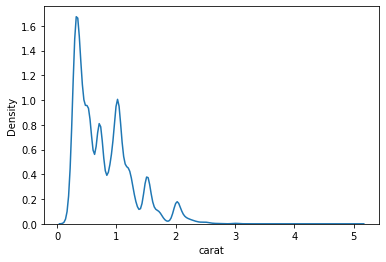

In [10]:
sns.kdeplot(df['carat'])

<AxesSubplot:xlabel='depth', ylabel='Density'>

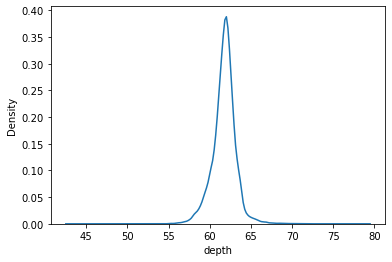

In [11]:
sns.kdeplot(df['depth'])

<AxesSubplot:xlabel='carat', ylabel='price'>

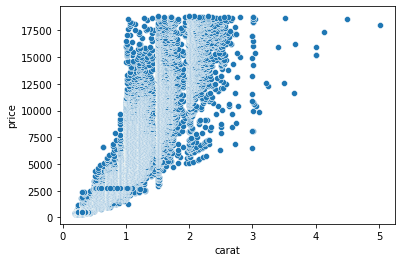

In [12]:
sns.scatterplot(x='carat',y='price',data=df)

<AxesSubplot:xlabel='color', ylabel='price'>

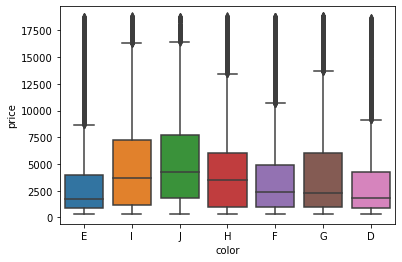

In [13]:
sns.boxplot(x='color',y='price',data = df)

<AxesSubplot:xlabel='cut', ylabel='price'>

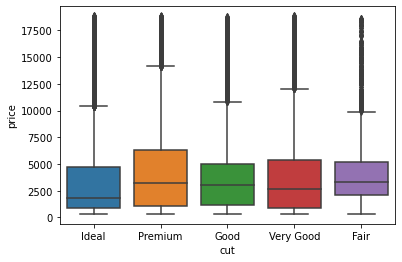

In [14]:
sns.boxplot(x='cut',y='price',data = df)

In [15]:
df = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']]

In [16]:
y = df['price']

X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]

# splitting dataset into train and test

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [18]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()


,cut,color,clarity
33169,Ideal,D,VS1
53170,Premium,E,SI1
27846,Ideal,D,VS1
20880,Premium,F,VVS2
28554,Premium,H,VS1


In [19]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,depth,table,x,y,z
33169,0.30,61.9,54.1,4.28,4.33,2.67
53170,0.71,59.5,62.0,5.85,5.74,3.45
27846,0.30,62.2,56.0,4.27,4.31,2.67
20880,1.02,62.9,59.0,6.42,6.37,4.02
28554,0.30,60.1,61.0,4.32,4.30,2.59


# Handle Categorical Columns

In [20]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
33169
53170
27846
20880
28554


In [21]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,cut
33169,4
53170,5
27846,4
20880,5
28554,5


In [22]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])

X_train_cat_le.head()


,cut,color
33169,4,7
53170,5,6
27846,4,7
20880,5,5
28554,5,3


In [23]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_train_cat_le.head()


,cut,color,clarity
33169,4,7,5
53170,5,6,3
27846,4,7,5
20880,5,5,6
28554,5,3,5


# standardizing the data

In [24]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,carat,depth,table,x,y,z
33169,-1.050294,0.099874,-1.495687,-1.293573,-1.220387,-1.249413
53170,-0.186302,-1.572250,2.031741,0.105090,0.003601,-0.128311
27846,-1.050294,0.308890,-0.647318,-1.302482,-1.237749,-1.249413
20880,0.466960,0.796592,0.692211,0.612885,0.550489,0.690955
28554,-1.050294,-1.154219,1.585231,-1.257938,-1.246430,-1.364397


In [25]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
33169,-1.050294,0.099874,-1.495687,-1.293573,-1.220387,-1.249413,4,7,5
53170,-0.186302,-1.572250,2.031741,0.105090,0.003601,-0.128311,5,6,3
27846,-1.050294,0.308890,-0.647318,-1.302482,-1.237749,-1.249413,4,7,5
20880,0.466960,0.796592,0.692211,0.612885,0.550489,0.690955,5,5,6
28554,-1.050294,-1.154219,1.585231,-1.257938,-1.246430,-1.364397,5,3,5


# test data preprocessing

In [26]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,cut,color,clarity
52264,Ideal,E,VS2
21073,Ideal,G,VS1
42161,Ideal,G,SI1
35974,Ideal,F,VS1
7641,Premium,G,IF


In [27]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()


,carat,depth,table,x,y,z
52264,0.57,61.5,57.0,5.35,5.32,3.28
21073,1.16,61.5,55.0,6.75,6.81,4.17
42161,0.51,63.2,58.0,5.05,5.08,3.20
35974,0.42,60.6,56.0,4.83,4.87,2.94
7641,0.80,62.6,58.0,5.89,5.93,3.70


In [28]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,carat,depth,table,x,y,z
52264,-0.481324,-0.178813,-0.200809,-0.340344,-0.360992,-0.372654
21073,0.761982,-0.178813,-1.093828,0.906871,0.932443,0.906552
42161,-0.607762,1.005608,0.245701,-0.607605,-0.569330,-0.487639
35974,-0.797419,-0.805860,-0.647318,-0.803596,-0.751626,-0.861339
7641,0.003355,0.587577,0.245701,0.140725,0.168535,0.231016


In [29]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_encoder[x])

X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_test_cat_le.head()

,cut,color,clarity
52264,4,6,4
21073,4,4,5
42161,4,4,3
35974,4,5,5
7641,5,4,8


In [30]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
52264,-0.481324,-0.178813,-0.200809,-0.340344,-0.360992,-0.372654,4,6,4
21073,0.761982,-0.178813,-1.093828,0.906871,0.932443,0.906552,4,4,5
42161,-0.607762,1.005608,0.245701,-0.607605,-0.569330,-0.487639,4,4,3
35974,-0.797419,-0.805860,-0.647318,-0.803596,-0.751626,-0.861339,4,5,5
7641,0.003355,0.587577,0.245701,0.140725,0.168535,0.231016,5,4,8


In [31]:
X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
33169,-1.050294,0.099874,-1.495687,-1.293573,-1.220387,-1.249413,4,7,5
53170,-0.186302,-1.572250,2.031741,0.105090,0.003601,-0.128311,5,6,3
27846,-1.050294,0.308890,-0.647318,-1.302482,-1.237749,-1.249413,4,7,5
20880,0.466960,0.796592,0.692211,0.612885,0.550489,0.690955,5,5,6
28554,-1.050294,-1.154219,1.585231,-1.257938,-1.246430,-1.364397,5,3,5


# KNN scratch implementation


In [32]:
def knn_predict(x_test,x_train,y_train,k):
    x_train_array = np.array(x_train)
    y_train_array = np.array(y_train)
    y_pred = np.array([])
    for datapoint in tqdm(x_test.values):
        distance = np.sqrt((np.array(datapoint-x_train_array)**2).sum(axis=1))
        sort_values = np.argsort(distance)
        sort_values = sort_values[:k]
        y_pred =np.append(y_pred, y_train_array[sort_values].mean())
    return y_pred
   

# applying KNN scratch function to data set

In [33]:
y_pred=knn_predict(X_test_transformed,X_train_transformed,y_train,5)
    
    

100%|████████████████████████████████████████████████████████████████████████████| 13485/13485 [02:33<00:00, 88.09it/s]


In [34]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

temp_df.head()  

,Actual,Predicted
52264,2491,1779.6
21073,9248,9000.6
42161,1284,1136.6
35974,921,960.4
7641,4268,5510.6


In [35]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))


print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  382.14985539488316
Mean Squared Error:  563416.7222840192
Root Mean Squared Error:  750.6108993906358


# Training a model using sklearn KNN Algorithm 

In [36]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [37]:
y_test_pred = regressor.predict(X_test_transformed)

In [38]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()


,Actual,Predicted
52264,2491,1779.6
21073,9248,9000.6
42161,1284,1136.6
35974,921,960.4
7641,4268,5510.6


In [39]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  382.1441453466815
Mean Squared Error:  563396.8540126067
Root Mean Squared Error:  750.597664539803


# comparing results:

In [40]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_pred, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_pred, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_pred, y_test_pred)))

Mean Absolute Error:  0.0408008898776419
Mean Squared Error:  2.4441053021876273
Root Mean Squared Error:  1.5633634581208642
